# Lab 9 - Monte Carlo Simulation
#### Daisy L Whitfield
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
##### Exercise 9.1 - slicing up an array

In [2]:
x = np.arange(10)
print("x = ", x) 
# all but the first element:
print("x[1:] = ", x [1:])
# all but the last element:
print("x[:-1] = ", x [:-1])
# the first 4 elements:
print("x[:4] = ", x [:4])
# elements from index 2 to 6:
print("x[2:7] = ", x [2:7])
# elements in reverse order:
print("x[::-1] = ", x [::-1])

x =  [0 1 2 3 4 5 6 7 8 9]
x[1:] =  [1 2 3 4 5 6 7 8 9]
x[:-1] =  [0 1 2 3 4 5 6 7 8]
x[:4] =  [0 1 2 3]
x[2:7] =  [2 3 4 5 6]
x[::-1] =  [9 8 7 6 5 4 3 2 1 0]


---
##### Exercise 9.2 - midpoint calculation trick

In [3]:
x = np.arange(5)
print("x = ", x) 
print("midpoints: ", (x [1:]+x[:-1])/2)

x =  [0 1 2 3 4]
midpoints:  [0.5 1.5 2.5 3.5]


---
##### Exercise 9.3 - picking a number in an array

In [4]:
x = np.array([1,2,1,4,5,1,7,3])
print("x = ", x) 
mask = x > 2
print("mask = ", mask) 
print("x[mask] = ", x [mask])

x =  [1 2 1 4 5 1 7 3]
mask =  [False False False  True  True False  True  True]
x[mask] =  [4 5 7 3]


---
##### Exercise 9.4 - counting through an array

In [5]:
x = np.array([1,2,1,4,5,1,7,3])
mask = x>3
np.sum(mask)

3

---
##### Exercise 9.5 - Park and Miller Function

In [6]:
a = 7 ** 5
c = 0
M = (2 ** 31) - 1

def parkmiller(i):
    i = (a * i + c) % M
    return i # updated value

In [7]:
n = 10000
l = 1

for i in range(n):
    l = parkmiller(l)

print(l)

1043618065


---
##### Exercise 9.6 - Park and Miller Fill an Array

In [8]:
xarr = np.array([])
s = 1

for i in range(5):
    s = parkmiller(s)
    xarr = np.append(xarr, s / M)
            
        

In [9]:
print(np.around(xarr ,2))

[0.   0.13 0.76 0.46 0.53]


---
##### Exercise 9.7 - np.random.uniform array

In [10]:
xarr = np.array([])

for i in range(5):
    xarr = np.append(xarr, np.random.uniform())

In [11]:
print(np.around(xarr ,2))

[0.76 0.72 0.26 0.95 0.06]


---
##### Exercise 9.8 - PDF

In [12]:
def pdf(x):
    p = np.array([])
    for i in range(len(x)):
        if 0 <= x[i] <= 1:
            s = 1
        else:
            s = 0
        p = np.append(p, s)
    return p

In [13]:
xf = np.linspace(-1.5,1.5,100)
yf = pdf(xf)

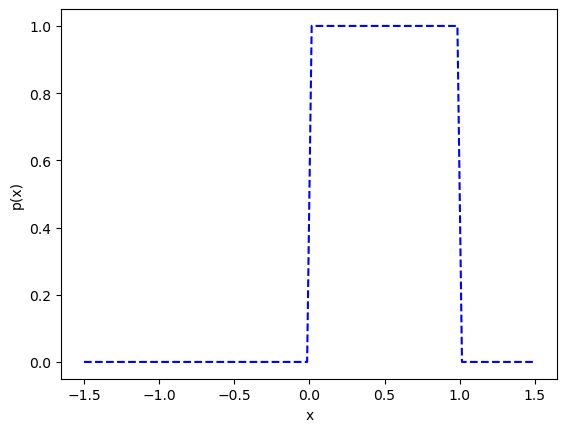

In [14]:
plt.plot(xf,yf,"--b")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()

---
##### Exercise 9.9 - histogram

Text(0, 0.5, 'Entries')

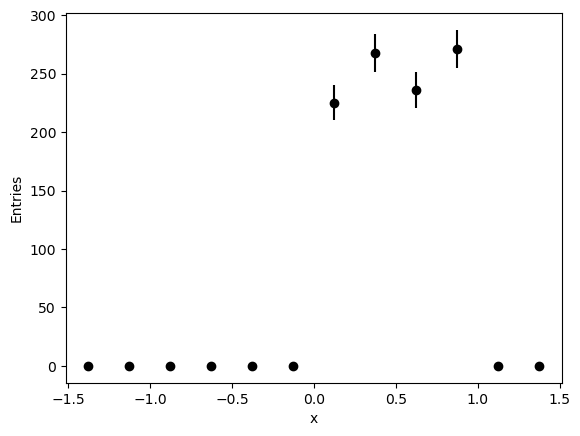

In [15]:
NTOT = 1000 # total number of events thrown
NBIN = 12 # number of bins in histogram
XMIN = -1.5 # maximum X value
XMAX = 1.5 # minimum X value
# throw NTOT random values uniformly in [0,1]:
xarr = np.random.uniform(size=NTOT)
#create a histogram from the random values in xarr:
# hx: the histogram counts (length NBIN)
# edges: the bin edges (length NBIN+1)
hx,edges = np.histogram(xarr ,bins=NBIN ,range=(XMIN ,XMAX))
# calculate the center of each bin, for plotting:
cbins = (edges[1:]+edges[:-1])/2
# calculate the error in each bin as the square root of the count
err = hx** 0.5
# plot the histogram, including errorbars, using the errorbar function:
plt.errorbar(cbins ,hx ,yerr=err ,fmt="ko",label="Histogram")
# add the labels
plt.xlabel("x")
plt.ylabel("Entries")

---
##### Exercise 9.10 - park and miller histogram

Text(0, 0.5, 'Entries')

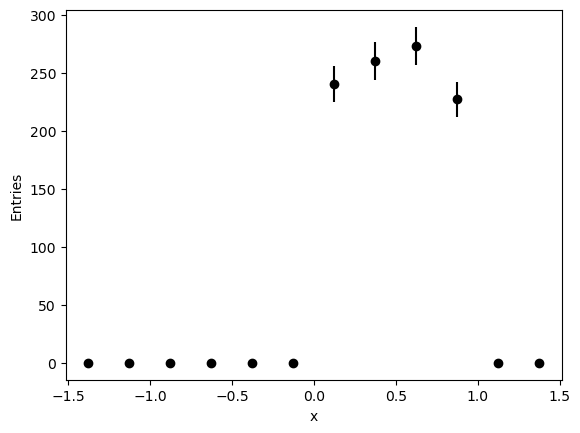

In [16]:
xarr = np.array([])
NN = 1000
s = 1

for i in range(NN):
    s = parkmiller(s)
    xarr = np.append(xarr, (s / M))
    


NBIN = 12
XMIN = -1.5
XMAX = 1.5
hx,edges = np.histogram(xarr ,bins=NBIN ,range=(XMIN ,XMAX))
cbins = (edges[1:]+edges[:-1])/2
err = hx** 0.5
plt.errorbar(cbins ,hx ,yerr=err ,fmt="ko",label="Histogram")
plt.xlabel("x")
plt.ylabel("Entries")

---
##### Exercise 9.11 - scaled PDF v Park and Miller Histogram

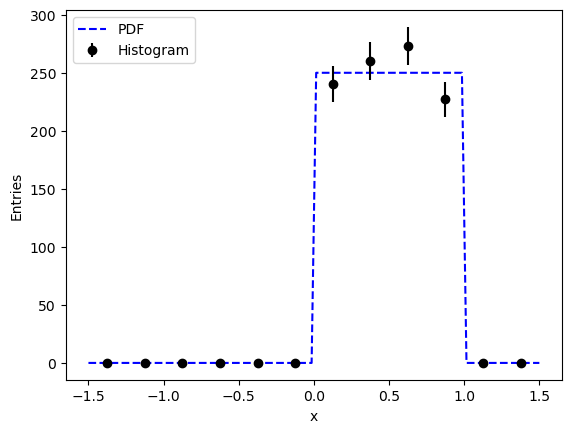

In [23]:
xarr = np.array([])
NN = 1000
s = 1

for i in range(NN):
    s = parkmiller(s)
    xarr = np.append(xarr, (s / M))
    

yf = yf * 250

plt.plot(xf,yf,"--b", label="PDF")
plt.xlabel("x")
plt.ylabel("p(x)")
NBIN = 12
XMIN = -1.5
XMAX = 1.5
hx,edges = np.histogram(xarr ,bins=NBIN ,range=(XMIN ,XMAX))
cbins = (edges[1:]+edges[:-1])/2
err = hx** 0.5
plt.errorbar(cbins ,hx ,yerr=err ,fmt="ko",label="Histogram")
plt.xlabel("x")
plt.ylabel("Entries")
plt.legend(frameon=True)
plt.legend(loc=2)
plt.show()

---
##### Exercise 9.12 - Monte Carlo Method

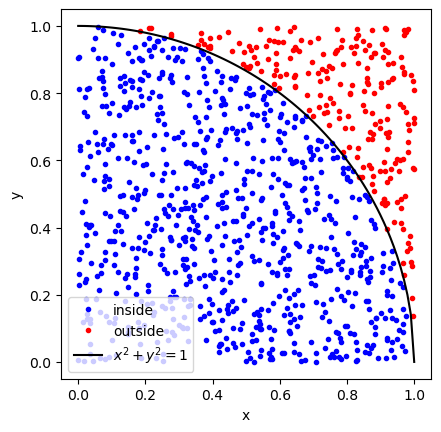

In [18]:
N = 1000 # number of random values to throw
# throw N x and y random variables uniform in [0,1]
x = np.random.uniform(size = N)
y = np.random.uniform(size = N)
# determine which (x,y) position or inside/outside the unit circle:
rsq = x** 2 + y** 2
inside = rsq<=1
outside = np.logical_not(inside)
# set aspect ratio to 1 so unit circle looks like a circle.
plt.axes().set_aspect('equal')
# plot inside as blue dots and outside as red dots
plt.plot(x[inside],y[inside],"b.",label="inside")
plt.plot(x[outside],y[outside],"r.",label="outside")
# plot the unit circle:
xfin = np.linspace(0,1,100)
yfin = np.sqrt(1-xfin** 2)
plt.plot(xfin ,yfin ,"k-",label="$x^2+y^2=1$")
# add labels and legends:
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=3)

In [19]:
n_inside = np.sum(inside)

In [20]:
print(n_inside)

788


In [33]:
print(np.pi)

3.141592653589793


In [39]:
print(((n_inside / N) * 4))

3.152


based on area I would have expected 1/4 of 2 * pi * r (because a quarter of a circle is within the line), or simply pi/2, of the dots to be within the line.  Put another way, I would expect 1 dot outside of the line for roughly every 1.6 dots inside of the line.

---
##### Exercise 9.13 - statistical uncertainty of a binomial process

In [24]:
sigma = np.sqrt((np.pi * (4 - np.pi)) / 1000)

In [25]:
print(sigma)

0.05193039777692651


Yes!  It is within the statistical uncertainty!

---
##### Exercise 9.14 - Monte Carlo Integration

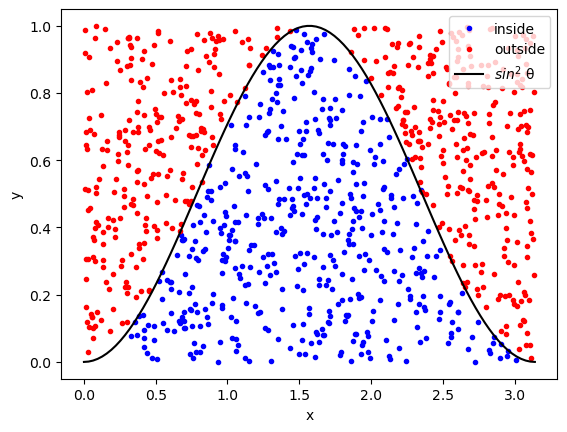

In [227]:
N = 1000
theta = np.random.uniform(low = 0, high = np.pi, size = N)
y = np.random.uniform(low = 0, high = 1, size = N)
# determine which (x,y) position or inside/outside the unit circle:
rsq = (np.sin(theta) ** 2)
inside = y <= rsq
outside = np.logical_not(inside)
# plot inside as blue dots and outside as red dots
plt.plot(theta[inside],y[inside],"b.",label="inside")
plt.plot(theta[outside],y[outside],"r.",label="outside")
xfin = np.linspace(0, np.pi, 100)
yfin = np.sin(xfin) ** 2
plt.plot(xfin ,yfin ,"k-",label="$sin^2$ \u03B8")
plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc=1)

In [228]:
nInside = sum(inside)

In [230]:
print(nInside)

473


In [231]:
print(nInside / N)

0.473


In [239]:
print((nInside / N) * np.pi)

1.485973325147972


In [240]:
sinQx = ((np.pi) / 2) - (np.sin(2 * np.pi) / 4)

In [241]:
print(sinQx)

1.5707963267948966


In [242]:
print(np.pi / (2 * np.sqrt(N)))

0.04967294132898051


From this, we can see that the result provided by our Analytical Analysis is only *JUST* outside of the statistical uncertainty when we calculate the integral.